In [36]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import h5py
import matplotlib.pyplot as plt


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
with h5py.File('/content/drive/MyDrive/NNDL/train_happy.h5', 'r') as f:
    X_train_full = np.array(f['train_set_x'])
    y_train_full = np.array(f['train_set_y'])

# Load testing data
with h5py.File('/content/drive/MyDrive/NNDL/test_happy.h5', 'r') as f:
    X_test = np.array(f['test_set_x'])
    y_test = np.array(f['test_set_y'])

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Flatten and normalize
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val = X_val.reshape(X_val.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Reshape y to 1D arrays
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)
y_test = y_test.reshape(-1)

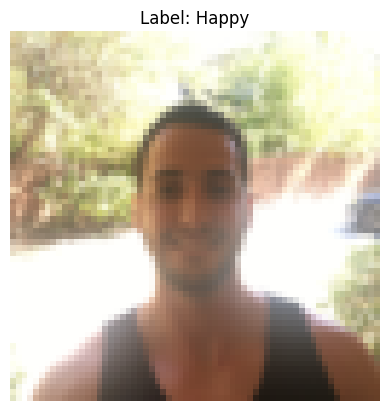

In [39]:
img = X_train[0].reshape(64, 64, 3)
plt.imshow(img)
plt.title(f"Label: {'Happy' if y_train[0] == 1 else 'Unhappy'}")
plt.axis('off')
plt.show()

# Logistic Regression

In [40]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, iterations=1000):
        self.lr = lr
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.losses = []
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.iterations):
            linear = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear)

            loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
            self.losses.append(loss)

            dw = np.dot(X.T, (y_pred - y)) / X.shape[0]
            db = np.mean(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear = np.dot(X, self.weights) + self.bias
        return (self.sigmoid(linear) > 0.5).astype(int)


# SVM Model

In [41]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


SVC(kernel='linear')

# Loss vs Iteration

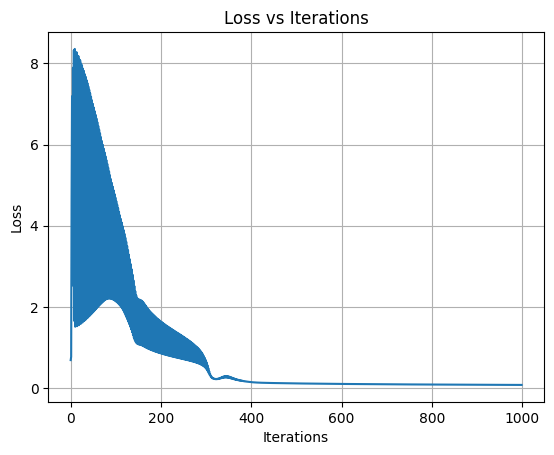

In [42]:
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid()
plt.show()


# Accuracy vs Learning Rate

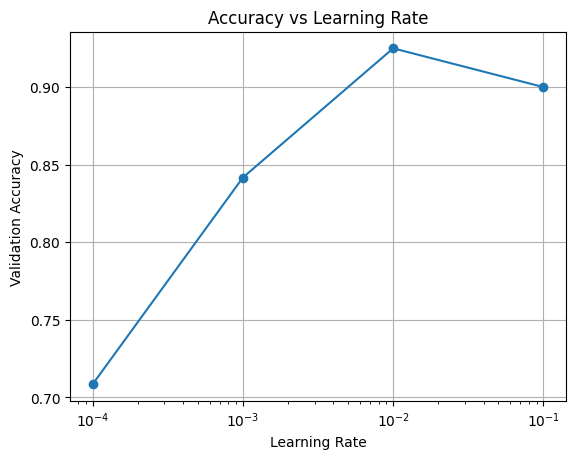

In [43]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
accuracies = []

for lr in learning_rates:
    model = LogisticRegressionScratch(lr=lr)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = np.mean(preds == y_val)
    accuracies.append(acc)

plt.plot(learning_rates, accuracies, marker='o')
plt.xscale('log')
plt.title("Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Validation Accuracy")
plt.grid()
plt.show()


# Accuracy vs. Training size

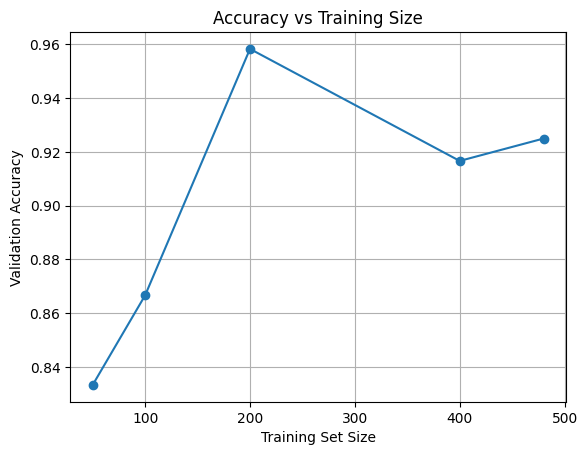

In [44]:
sizes = [50, 100, 200, 400, len(X_train)]
size_accs = []

for size in sizes:
    X_sub = X_train[:size]
    y_sub = y_train[:size]
    model = LogisticRegressionScratch(lr=0.01)
    model.fit(X_sub, y_sub)
    preds = model.predict(X_val)
    acc = np.mean(preds == y_val)
    size_accs.append(acc)

plt.plot(sizes, size_accs, marker='o')
plt.title("Accuracy vs Training Size")
plt.xlabel("Training Set Size")
plt.ylabel("Validation Accuracy")
plt.grid()
plt.show()


# Model Comparison (Logistic reg. vs SVM)

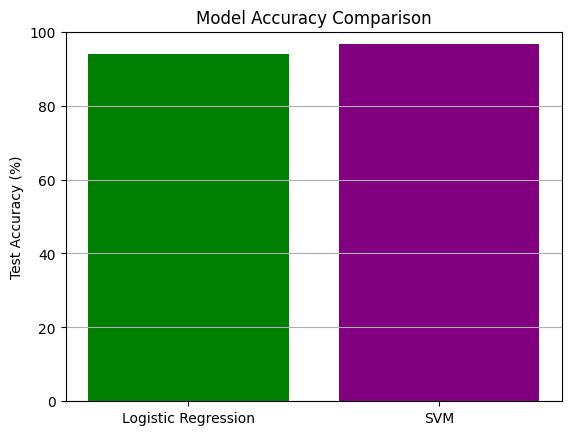

In [45]:
plt.bar(["Logistic Regression", "SVM"], [logistic_test_acc, svm_accuracy], color=["green", "purple"])
plt.ylabel("Test Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.grid(axis="y")
plt.show()

In [46]:
# Calculate test accuracy for Logistic Regression
logistic_test_preds = model.predict(X_test)
logistic_test_acc = np.mean(logistic_test_preds == y_test) * 100

# Calculate test accuracy for SVM
svm_test_preds = svm.predict(X_test)
svm_accuracy = np.mean(svm_test_preds == y_test) * 100

print(f"Logistic Regression Test Accuracy: {logistic_test_acc:.2f}%")
print(f"SVM Test Accuracy: {svm_accuracy:.2f}%")

Logistic Regression Test Accuracy: 94.00%
SVM Test Accuracy: 95.33%
